In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("IT-Salary-Survey-EU-2020.csv")

In [73]:
column_names = df.columns
print(column_names)

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [74]:
# Get a summary of the DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [75]:
# Rename the columns to follow a proper naming convention
df.rename(columns={'Total years of experience': 'Total_Exp',
                   'Years of experience in Germany': 'Exp_Germany',
                   'Your main technology / programming language': 'Main_Tech',
                   'Other technologies/programming languages you use often': 'Other_Tech',
                   'Yearly bonus + stocks in EUR': 'Bonus_Stocks',
                   'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Brutto_Salary_Last_Year',
                   'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Bonus_Stocks_Last_Year',
                   'Number of vacation days': 'Vacation_Days',
                   'Have you lost your job due to the coronavirus outbreak?': 'Lost_Job_Due_To_COVID',
                   'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'Shorter_Work_Week_Due_To_COVID',
                   'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR': 'Additional_Support_Due_To_WFH'
                  }, inplace=True)

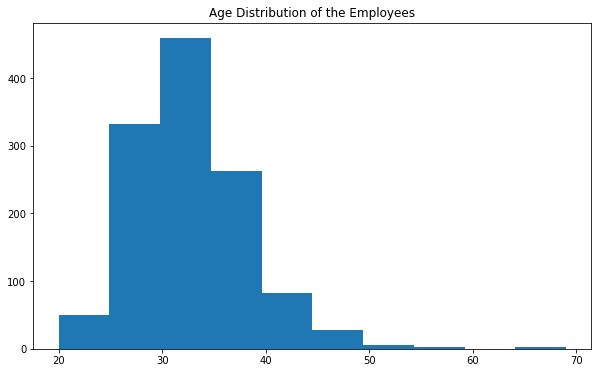

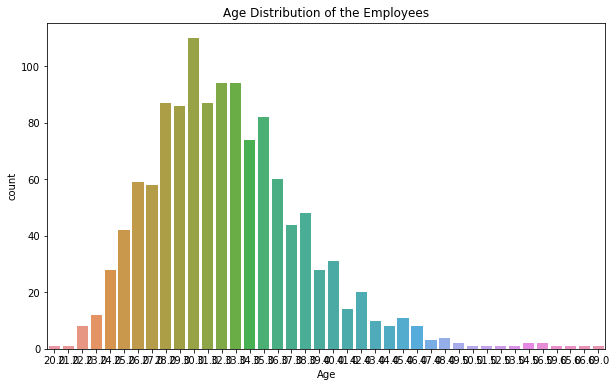

In [76]:
# Using pyplot to plot a graph showing the age distribution of the employees
plt.figure(figsize=(10, 6)) # Set the figure size
plt.hist(df['Age'], bins=10) # Plot the histogram. Bins is
plt.title('Age Distribution of the Employees')
plt.show()

# A graph showing the age distribution of the employees using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution of the Employees')
plt.show()



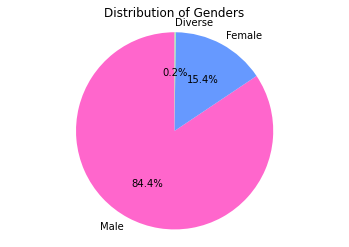

In [77]:
# A pie chart showing the gender distribution of the employees
gender_counts = df['Gender'].value_counts()

labels = gender_counts.index.tolist()
sizes = gender_counts.tolist()
colors = ['#ff66cc', '#6699ff', '#99ff99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Genders')
plt.show()

In [78]:
# Number of cities in the dataset
print(df['City'].nunique())

119


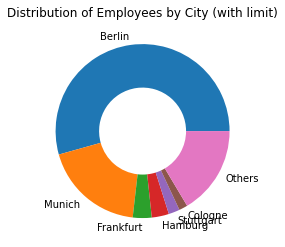

In [79]:
# NB: There could be a better way of using the city data to plot a graph
# Plotting a donut chart showing the distribution of employees by city (with limits of 10 employees per city)

# set the limit for the number of employees per city
limit = 10

# group by city and count the number of employees
city_counts = df['City'].value_counts()
city_counts = city_counts[city_counts >= limit]

# add a category for cities with less than the limit
other_count = len(df) - city_counts.sum()
city_counts['Others'] = other_count

# create a donut chart
plt.pie(city_counts.values, labels=city_counts.index, wedgeprops=dict(width=0.5))
plt.title("Distribution of Employees by City (with limit)")
plt.show()


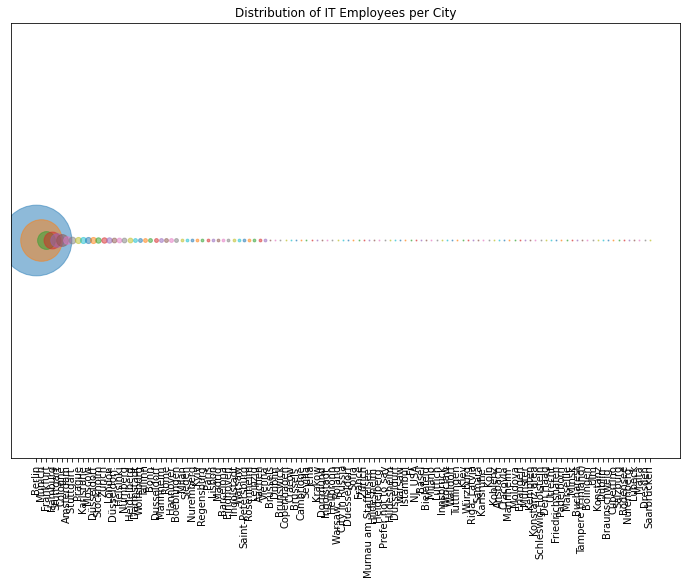

In [80]:
# Group the data by city and count the number of respondents in each city
city_counts = df['City'].value_counts()

# Create a new dataframe with the city counts
city_data = pd.DataFrame({'city': city_counts.index, 'count': city_counts.values})

# Create a new column in the city_data dataframe with bubble sizes proportional to the number of respondents
max_size = 5000
city_data['size'] = city_data['count'].apply(lambda x: 1 + int(max_size * (x - city_data['count'].min()) / (city_data['count'].max() - city_data['count'].min())))

# Create a bubble chart using the city_data dataframe
fig, ax = plt.subplots(figsize=(12,8))

for i in range(len(city_data)):
    ax.scatter(i, 0, s=city_data.loc[i, 'size'], alpha=0.5)

# Set the x-axis tick labels to be the city names
ax.set_xticks(range(len(city_data)))
ax.set_xticklabels(city_data['city'], rotation=90)

# Remove the y-axis ticks
ax.yaxis.set_ticks([])

# Set the chart title
ax.set_title('Distribution of IT Employees per City')

# Show the chart
plt.show()

In [81]:
from pandas_profiling import ProfileReport

# Generate a profile report
profile = ProfileReport(df, title='Pandas Profiling Report')
# profile.to_notebook_iframe()

# Convert the dataframe to an HTML file
# profile.to_file("output.html")
profile.to_file(output_file="salary_eda_report.html")

TypeError: dataclass_transform() got an unexpected keyword argument 'field_specifiers'